<a href="https://colab.research.google.com/github/HussainPythonista/Australian_Housing_Prediction/blob/main/Housing_DataSet_Data_Preparation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statements:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.
 

## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

 
Dataset Location:
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [82]:
#Importing Necessary Library

#Basic Numerical Operation
import pandas as pd
import numpy as np

#visualize the data
import matplotlib.pyplot as plt
import seaborn as sb


#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [83]:
#Mounting the Drive

house_price=pd.read_csv("/content/drive/MyDrive/ML_Dataset/house_price_Cleaned_standarized.csv")
house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.131022,RL,0.237179,-0.333130,Pave,No Feature,Reg,Lvl,AllPub,Inside,...,-0.786974,0.350400,No Feature,No Feature,No Feature,-1.598563,0.138730,WD,Normal,208500
1,-0.935412,RL,0.692573,-0.013184,Pave,No Feature,Reg,Lvl,AllPub,FR2,...,1.767499,-0.811469,No Feature,No Feature,No Feature,-0.488943,-0.614228,WD,Normal,181500
2,0.131022,RL,0.328258,0.445869,Pave,No Feature,IR1,Lvl,AllPub,Inside,...,-0.786974,-0.011493,No Feature,No Feature,No Feature,0.990552,0.138730,WD,Normal,223500
3,0.397630,RL,0.085381,-0.027095,Pave,No Feature,IR1,Lvl,AllPub,Corner,...,-0.786974,-0.144823,No Feature,No Feature,No Feature,-1.598563,-1.367186,WD,Abnorml,140000
4,0.131022,RL,0.814011,1.283293,Pave,No Feature,IR1,Lvl,AllPub,FR2,...,0.858861,0.788482,No Feature,No Feature,No Feature,2.100173,0.138730,WD,Normal,250000


## Data Preparation

### Convert the target variable into Normal Distribution

- In previous notebook we saw that our target variable is in Right skew format, we need to Hanfle before Model building

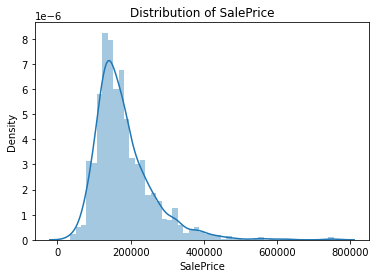

In [84]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sb.distplot(house_price['SalePrice'])
plt.show()

In [85]:
 #log transformed SalePrice is normally distributed, hence transformed data will be used for model building

house_price['SalePrice']= np.log(house_price['SalePrice'])

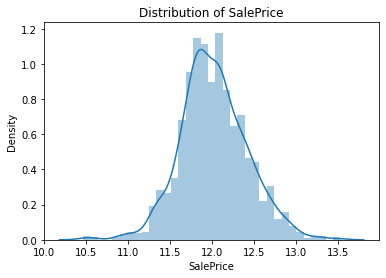

In [86]:
plt.title('Distribution of SalePrice')
sb.distplot(house_price['SalePrice'])
plt.show()

**After converting the Normal distribution**

### Creating Dummy Variables

In [87]:
#Gathering Categorical Variables
categorical_variables=house_price.select_dtypes("object").columns
categorical_variables

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [88]:
#Gathering and Assigning the categorical columns
dummieVariables=pd.get_dummies(house_price[categorical_variables],drop_first=True)

#Creating New datafame with combine dummies and parent Dataframe 
house_price_final=pd.concat([house_price,dummieVariables],axis=1)

#Dropping the categorical variable from final Dataset
house_price_final.drop(columns=categorical_variables,inplace=True)

In [89]:
#Checking the shape of data
house_price_final.shape

(1460, 253)

In [90]:
house_price_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.131022,0.237179,-0.333130,0.652420,-0.563967,1.052885,0.878367,0.795371,0.614013,-0.958462,...,0,0,0,0,1,0,0,0,1,0
1,-0.935412,0.692573,-0.013184,-0.073043,2.030211,0.156125,-0.429430,-0.667124,1.241871,-0.648068,...,0,0,0,0,1,0,0,0,1,0
2,0.131022,0.328258,0.445869,0.652420,-0.563967,0.986459,0.829930,0.541673,0.106187,-0.300613,...,0,0,0,0,1,0,0,0,1,0
3,0.397630,0.085381,-0.027095,0.652420,-0.563967,-1.869888,-0.720051,-0.667124,-0.517053,-0.055078,...,0,0,0,0,1,0,0,0,0,0
4,0.131022,0.814011,1.283293,1.377883,-0.563967,0.953245,0.733056,1.944474,0.496290,-0.170896,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.131022,0.146100,-0.481418,-0.073043,-0.563967,0.920032,0.733056,-0.667124,-1.015646,0.901582,...,0,0,0,0,1,0,0,0,1,0
1456,-0.935412,0.844371,0.981431,-0.073043,0.473704,0.222552,0.151813,0.220819,0.807910,0.058424,...,0,0,0,0,1,0,0,0,1,0
1457,0.397630,0.267539,-0.168427,0.652420,2.030211,-1.006341,1.023678,-0.667124,-0.380864,0.725538,...,0,0,0,0,1,0,0,0,1,0
1458,-0.935412,0.328258,0.019367,-0.798506,0.473704,-0.707421,0.539309,-0.667124,-0.902539,-1.305917,...,0,0,0,0,1,0,0,0,1,0


### Checking the Multicollinearity

- Here I'm gonna check the correlation between the independent variables, Dropping the Higher corealtion variables

In [91]:
len(house_price_final.columns)

253

In [92]:
columns_value=house_price_final.columns

batch_1=columns_value[:25]
batch_2=columns_value[25:50]
batch_3=columns_value[50:75]
batch_4=columns_value[75:100]
batch_5=columns_value[100:125]
batch_6=columns_value[125:150]
batch_7=columns_value[150:175]
batch_8=columns_value[175:200]
batch_9=columns_value[200:225]
batch_10=columns_value[225:]

#### Batch 1 Corelation 

- Checking the Correlation and handle highly corelated variables

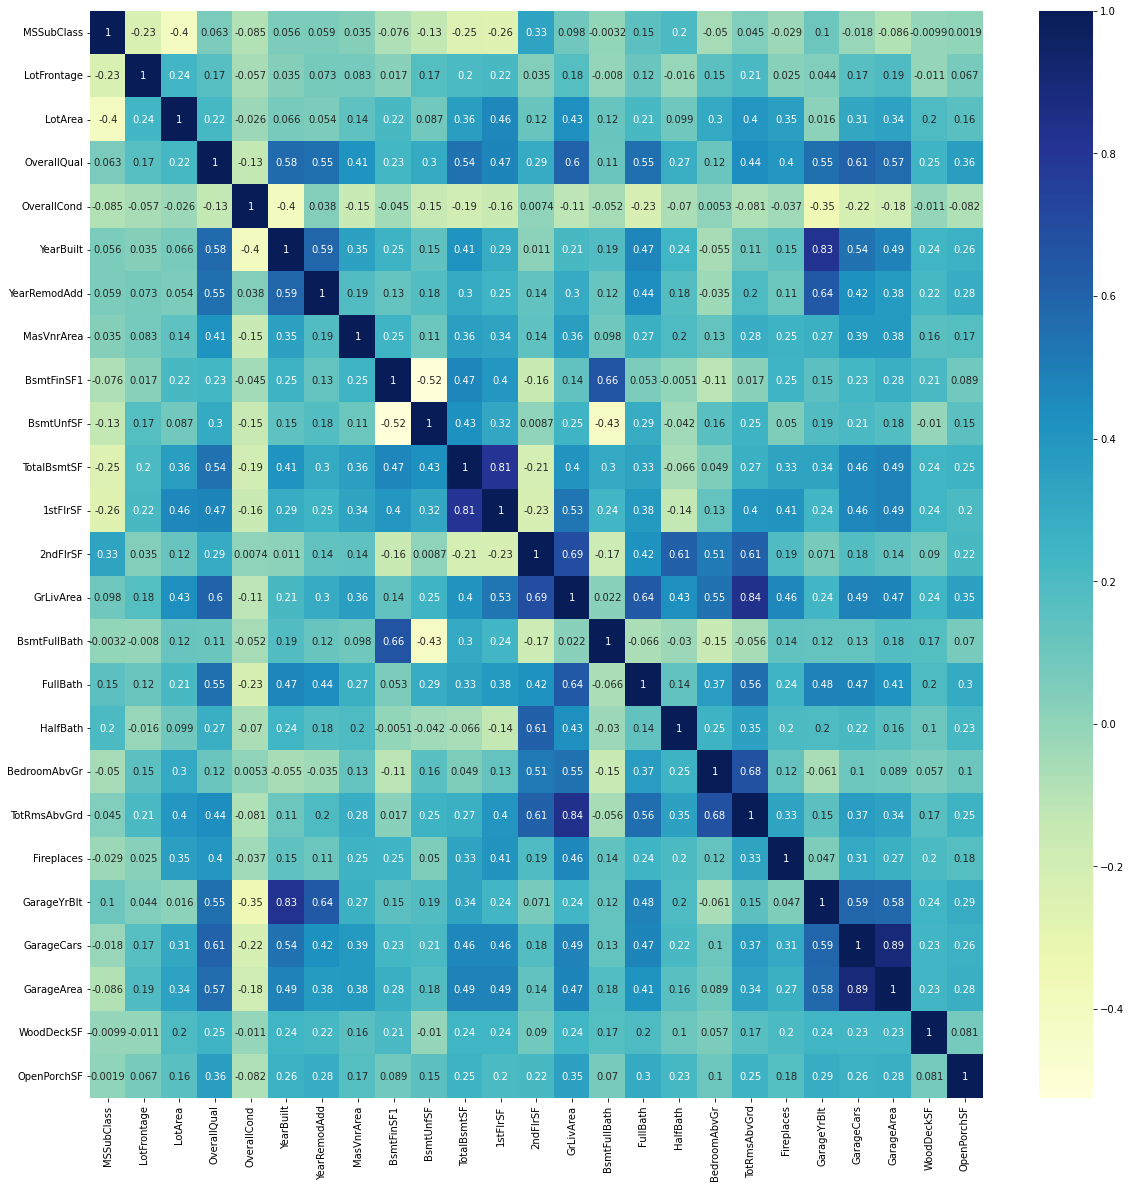

In [93]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_1].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

- **GarageArea and GarageCars has 89% of co-relation**
- **GarageYrBlt and YearBuilt has 83% of co-relation**
- **TotRmsAbvGrd and GrLivArea has 84% of co-relation**

Dropping either one of them is better idea as of now

In [94]:
house_price_final.drop(columns=["GarageCars","GarageYrBlt","GrLivArea"],inplace=True)

#### Batch 2 Corelation 

- Checking the Correlation and handle highly corelated variables

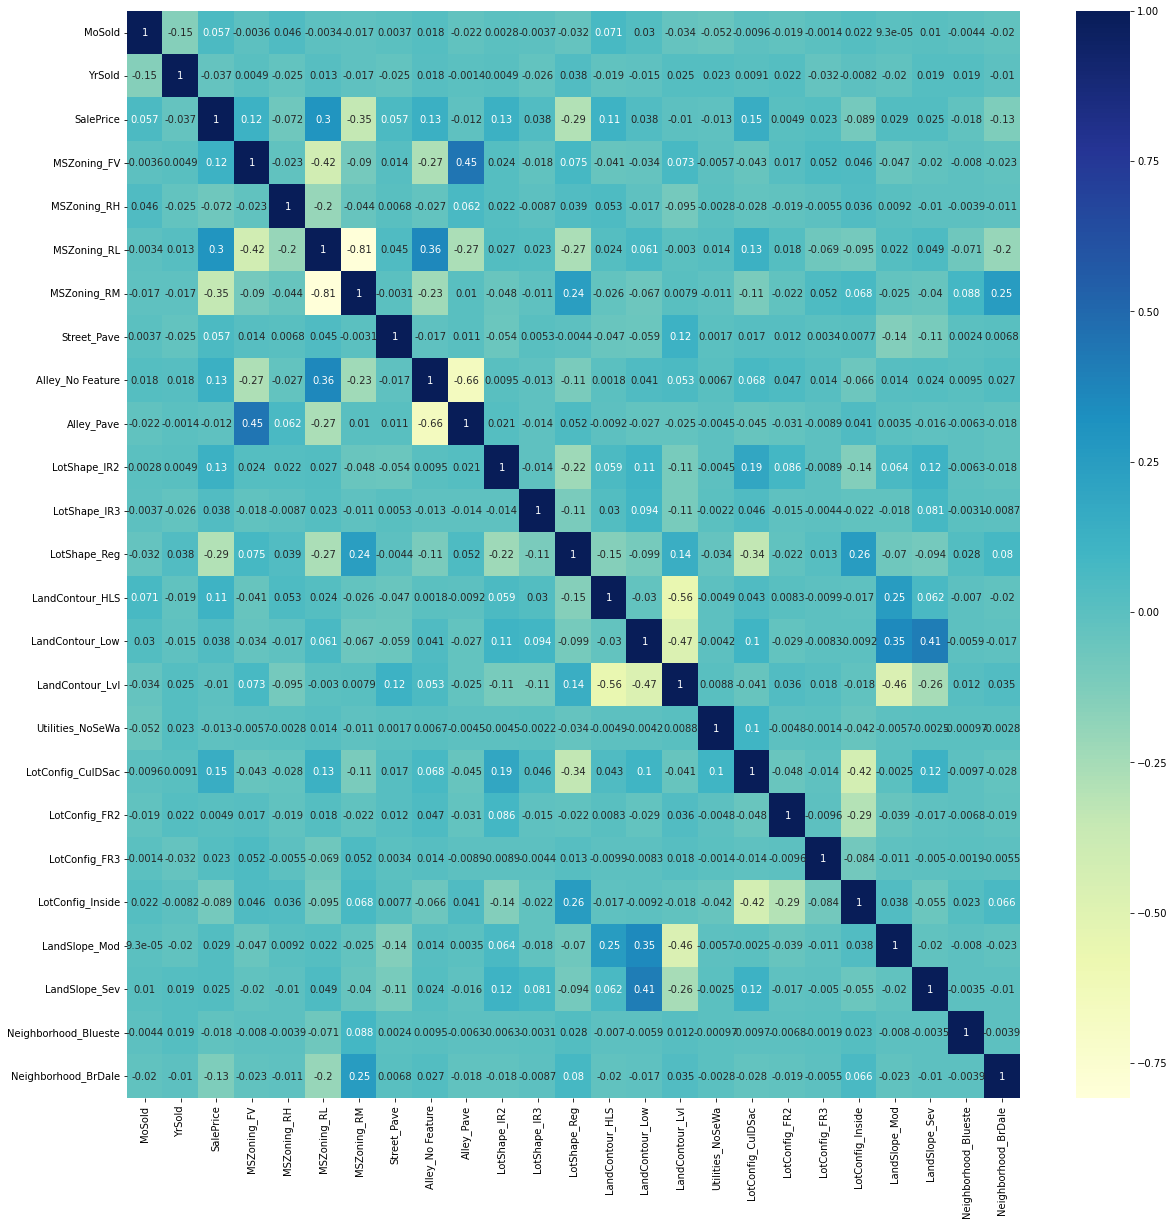

In [95]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_2].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

**MSZoning_RL,MSZoning_RM has -81% corelation**

In [96]:
house_price_final.drop(columns="MSZoning_RL",inplace=True)

#### Batch 3 Corelation

Checking the Correlation and handle highly corelated variables

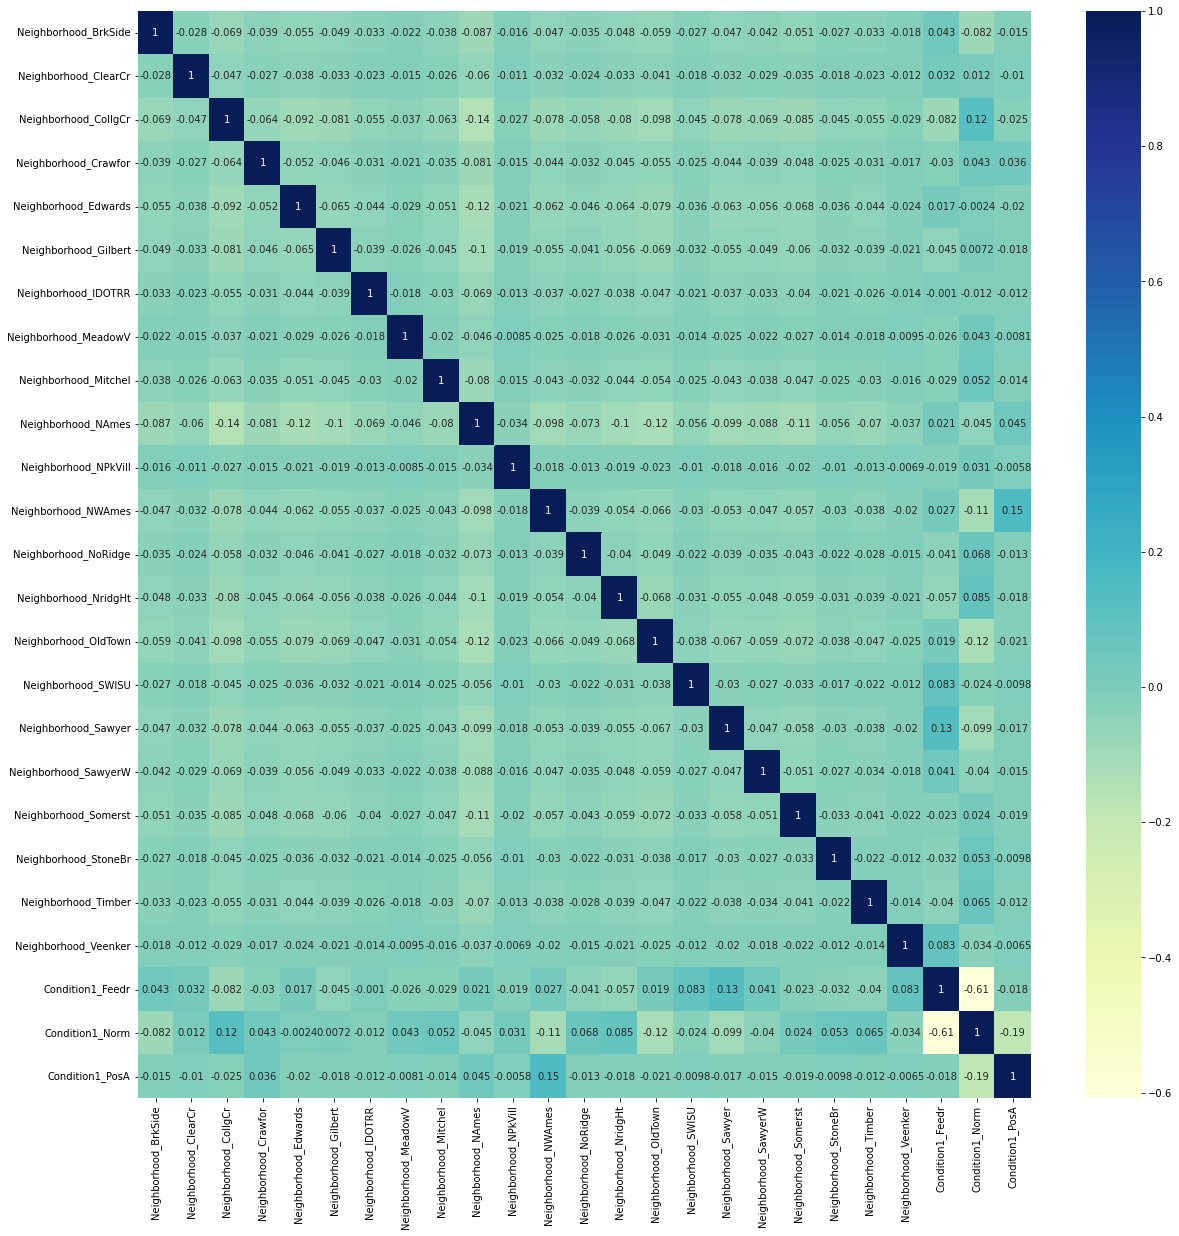

In [97]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_3].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

#### Batch 4 Corelation
Checking the Correlation and handle highly corelated variables

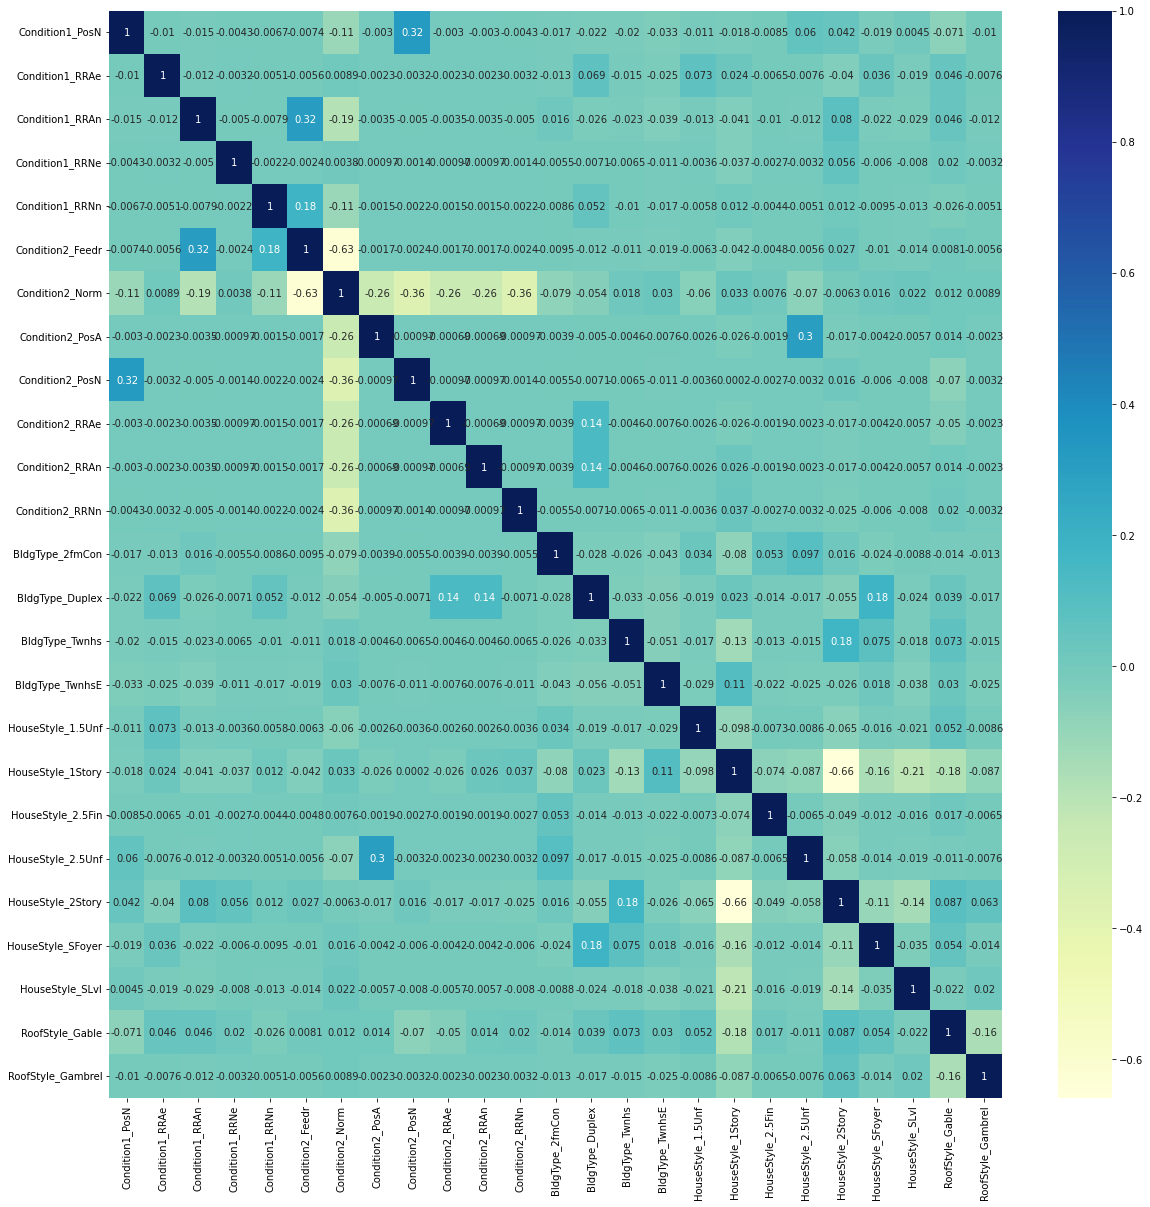

In [98]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_4].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

#### Batch 5 Corelation
Checking the Correlation and handle highly corelated variables

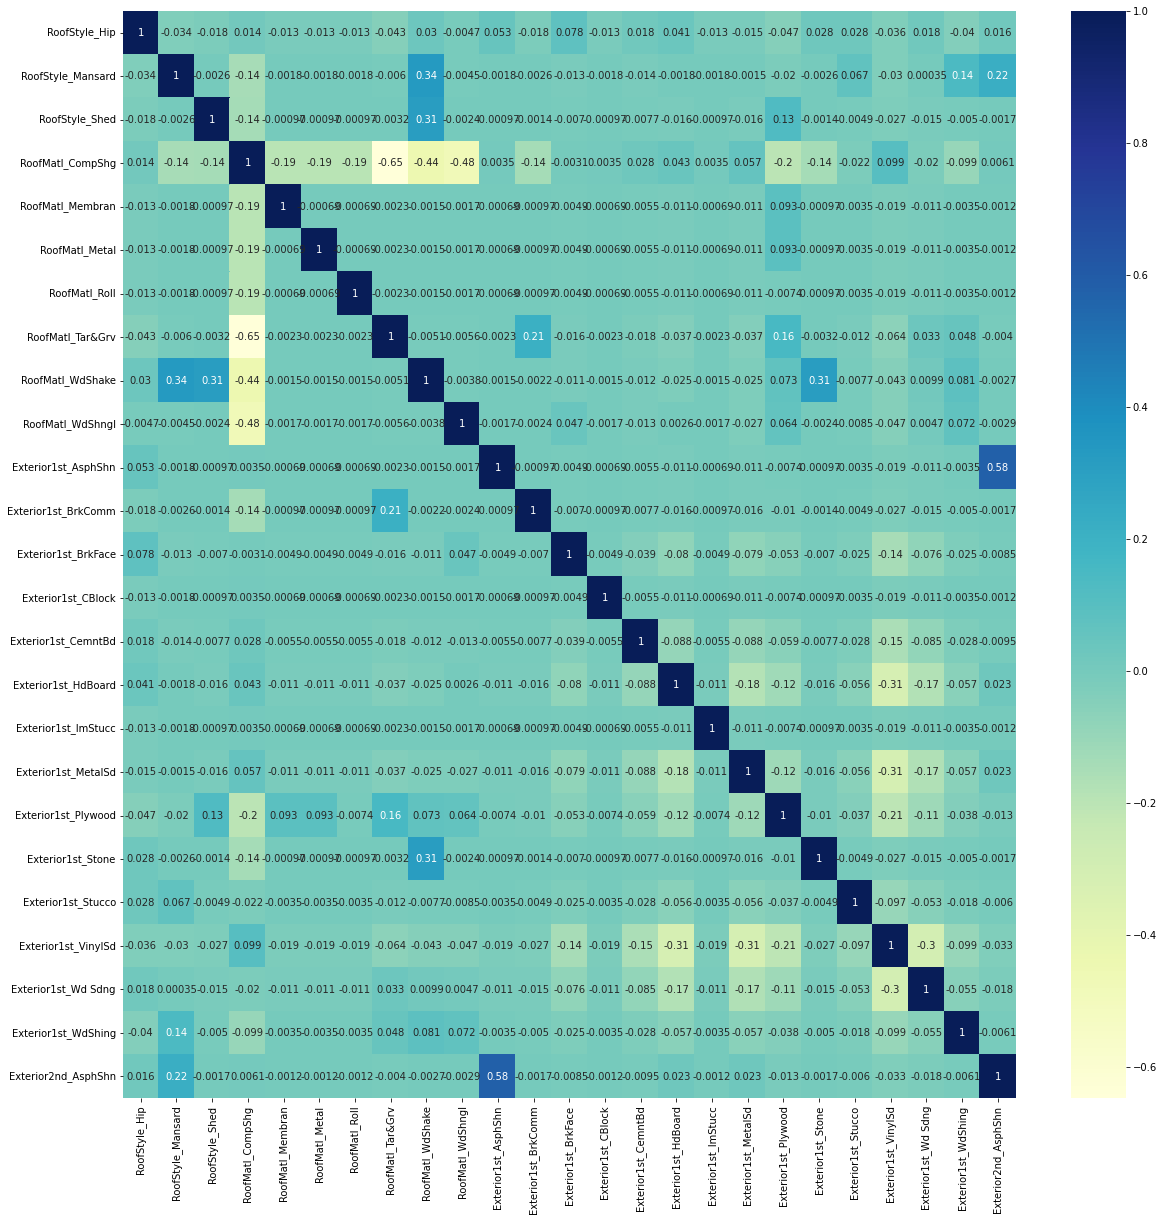

In [99]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_5].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

#### Batch 6 Corelation
Checking the Correlation and handle highly corelated variables

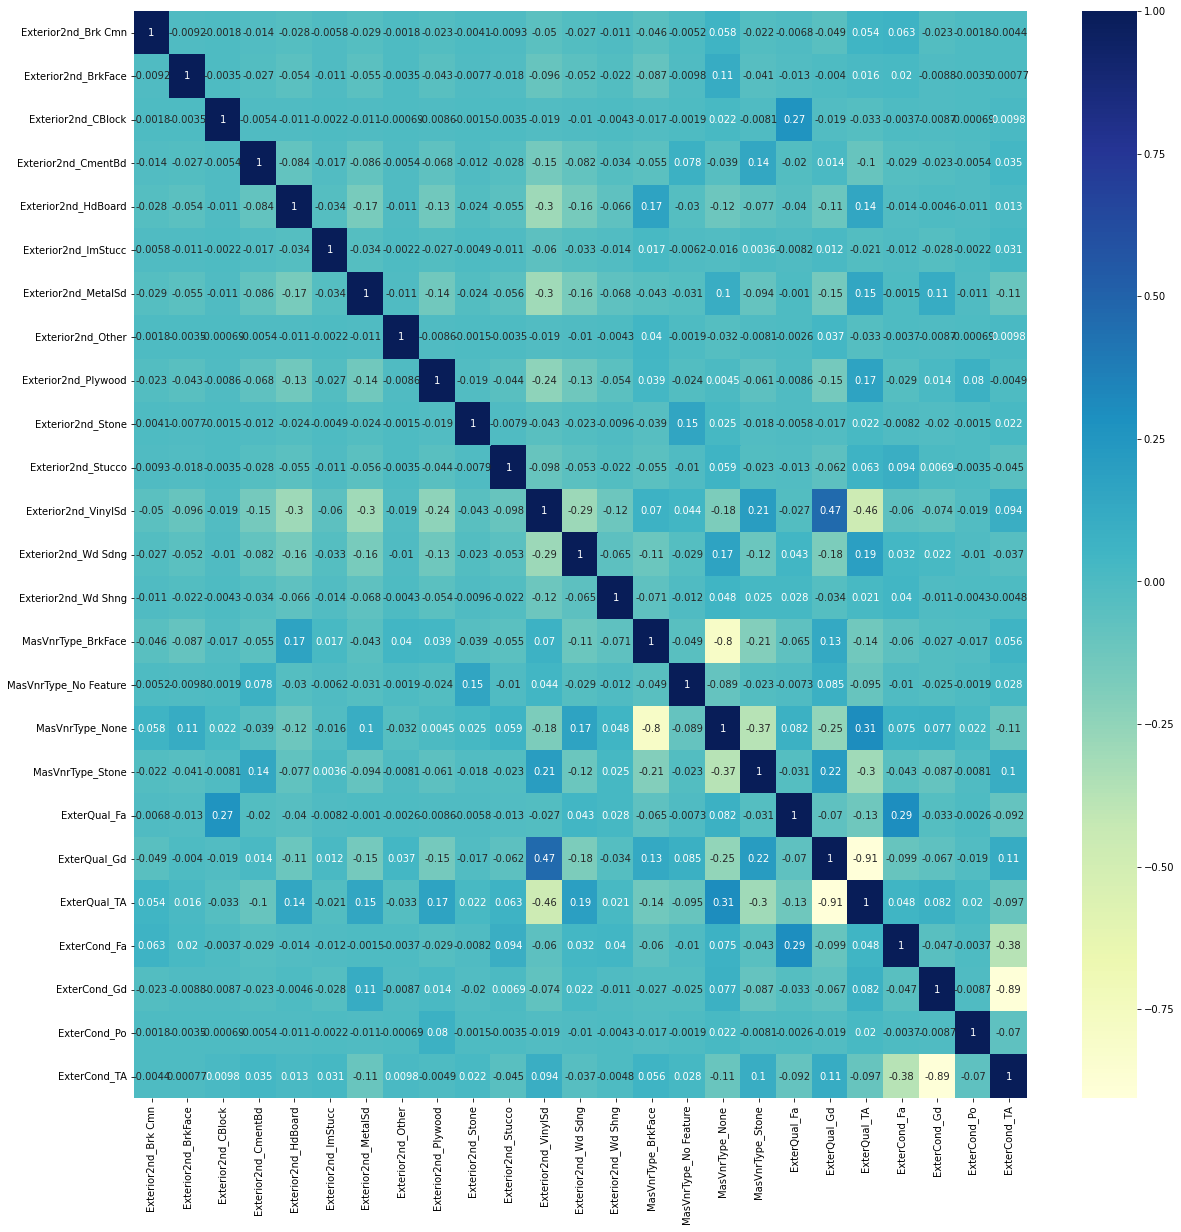

In [100]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_6].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

**Decision**
- ExterQual_GD and ExterQual_TA has -91% of corelation
- ExterCond_Po and ExterCond_TA has -89% of corelation


In [101]:
house_price_final.drop(columns=["ExterCond_Po","ExterQual_Gd"],inplace=True)

#### Batch 7 Corelation
Checking the Correlation and handle highly corelated variables

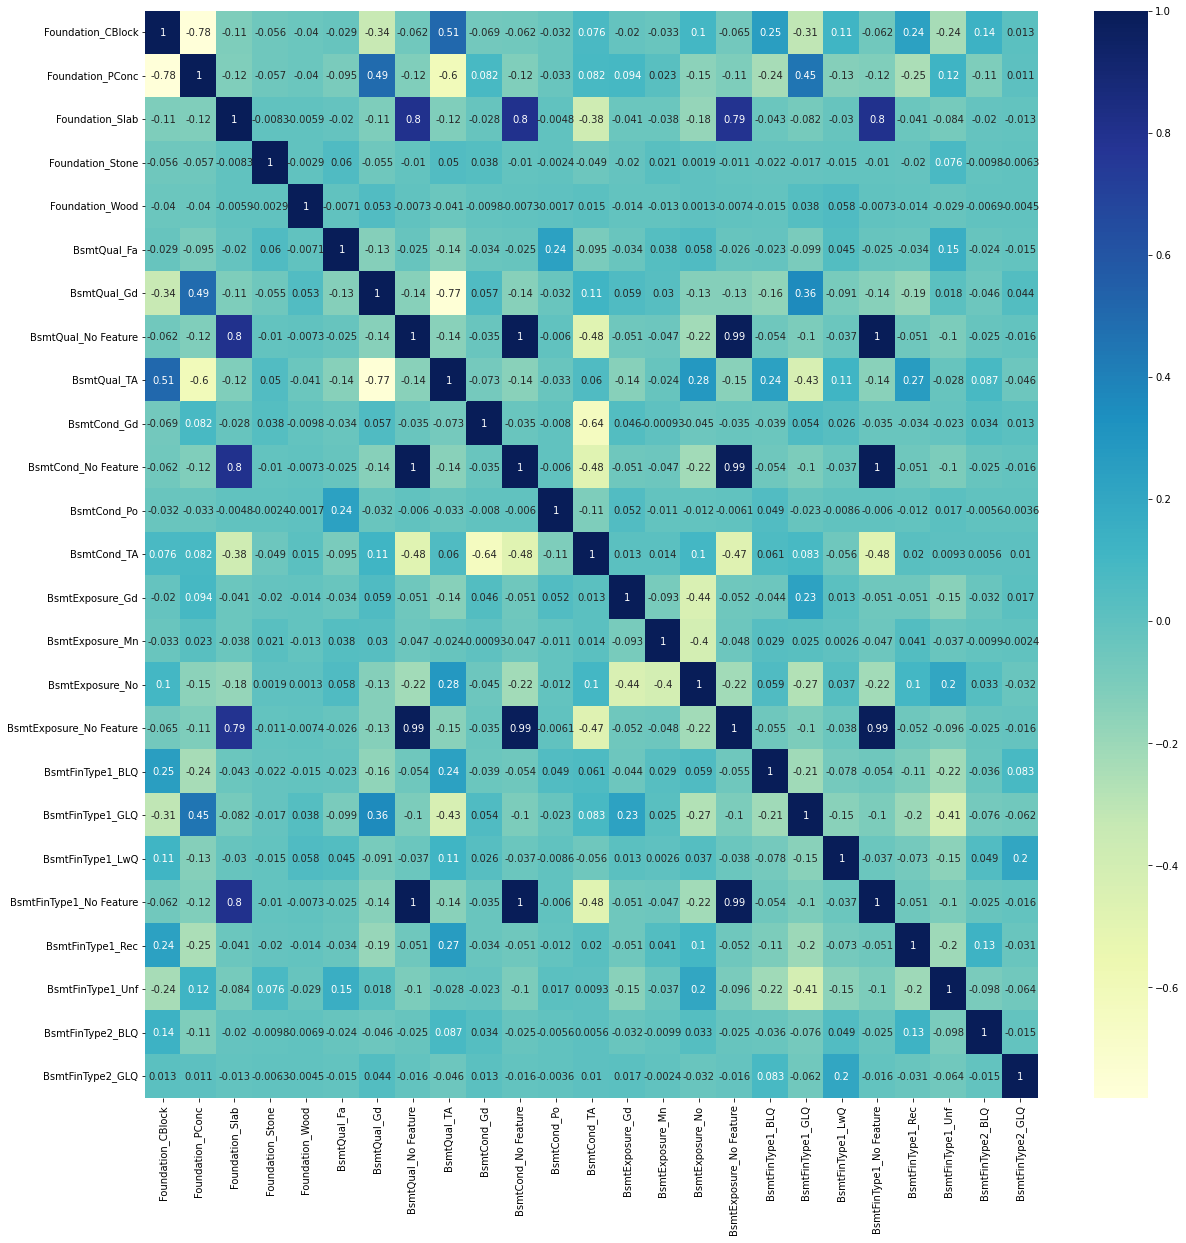

In [102]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_7].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [103]:
house_price_final.drop(columns=["BsmtCond_No Feature","BsmtFinType1_No Feature","BsmtExposure_No Feature"],inplace=True)

#### Batch 8 Corelation
Checking the Correlation and handle highly corelated variables

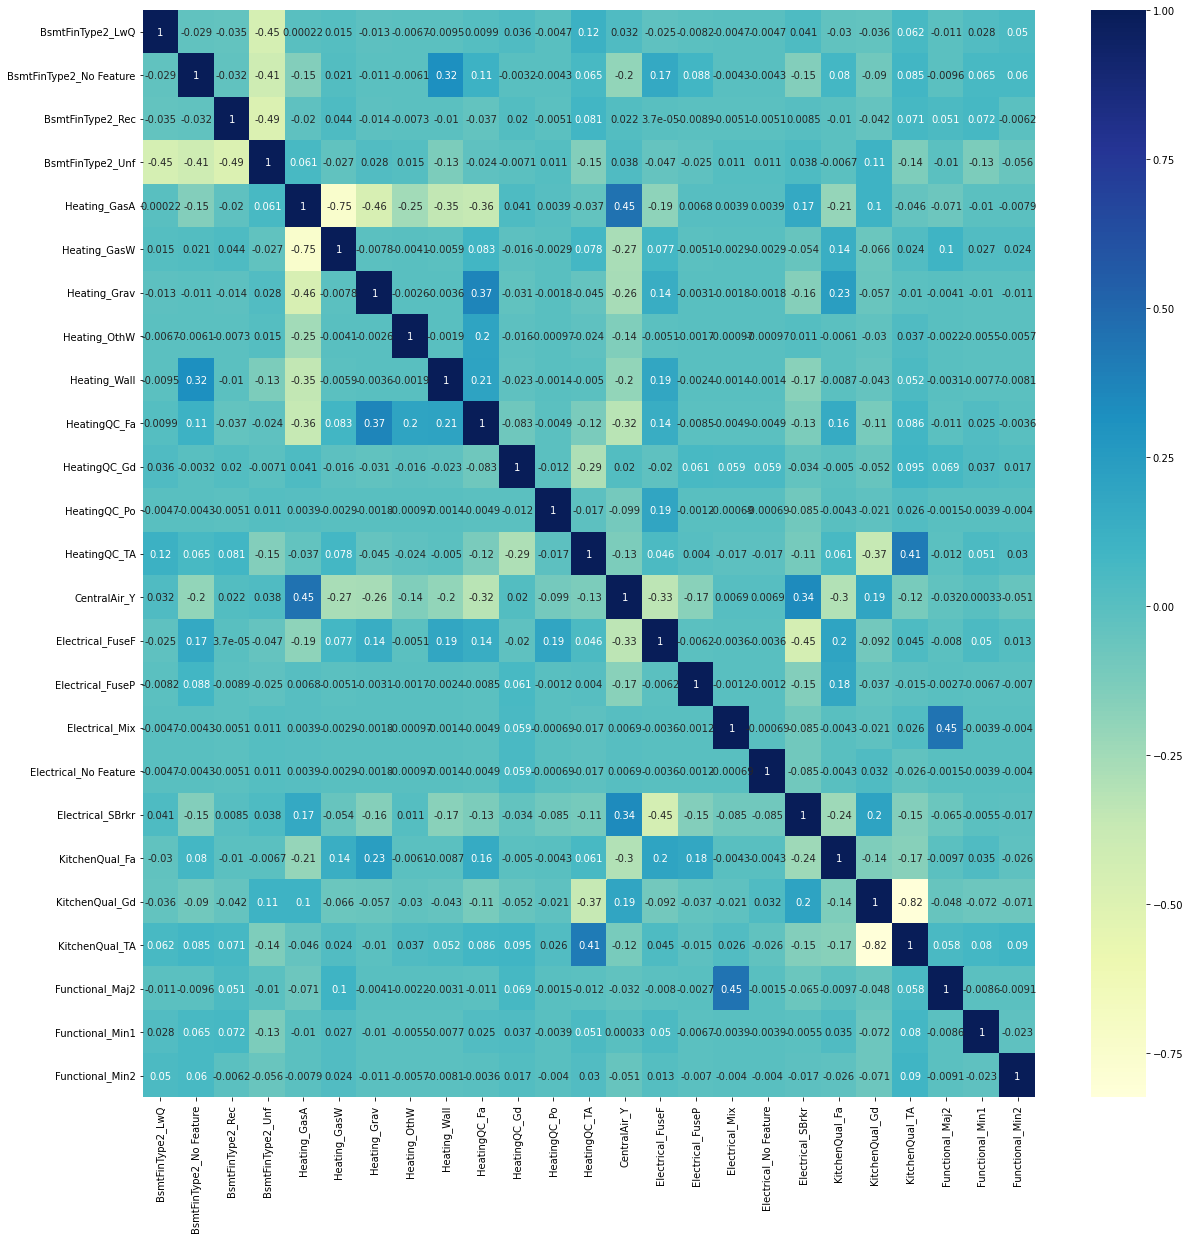

In [104]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_8].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

#### Batch 9 Corelation
Checking the Correlation and handle highly corelated variables

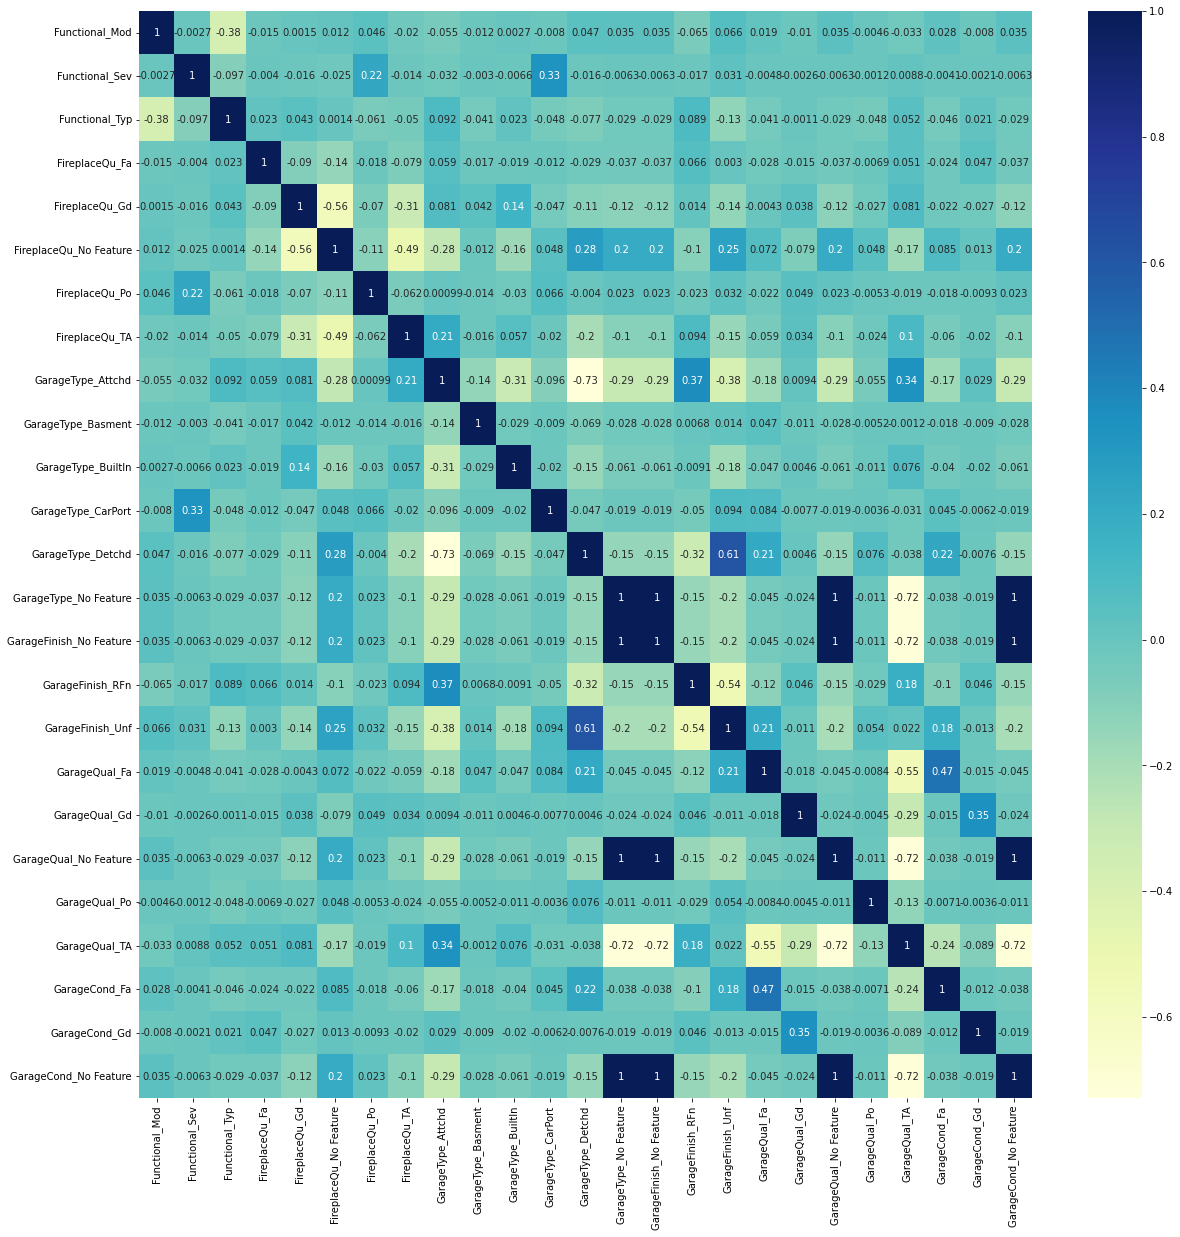

In [105]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_9].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

**Decision**
- **GarageCond_No_Feature has high rate of corelation with other variables**
- **GarageQual_No_Feature has high amount of co-relation with other variables** 


In [106]:
house_price_final.drop(columns=["GarageCond_No Feature","GarageQual_No Feature"],inplace=True)

#### Batch 10 Corelation
Checking the Correlation and handle highly corelated variables

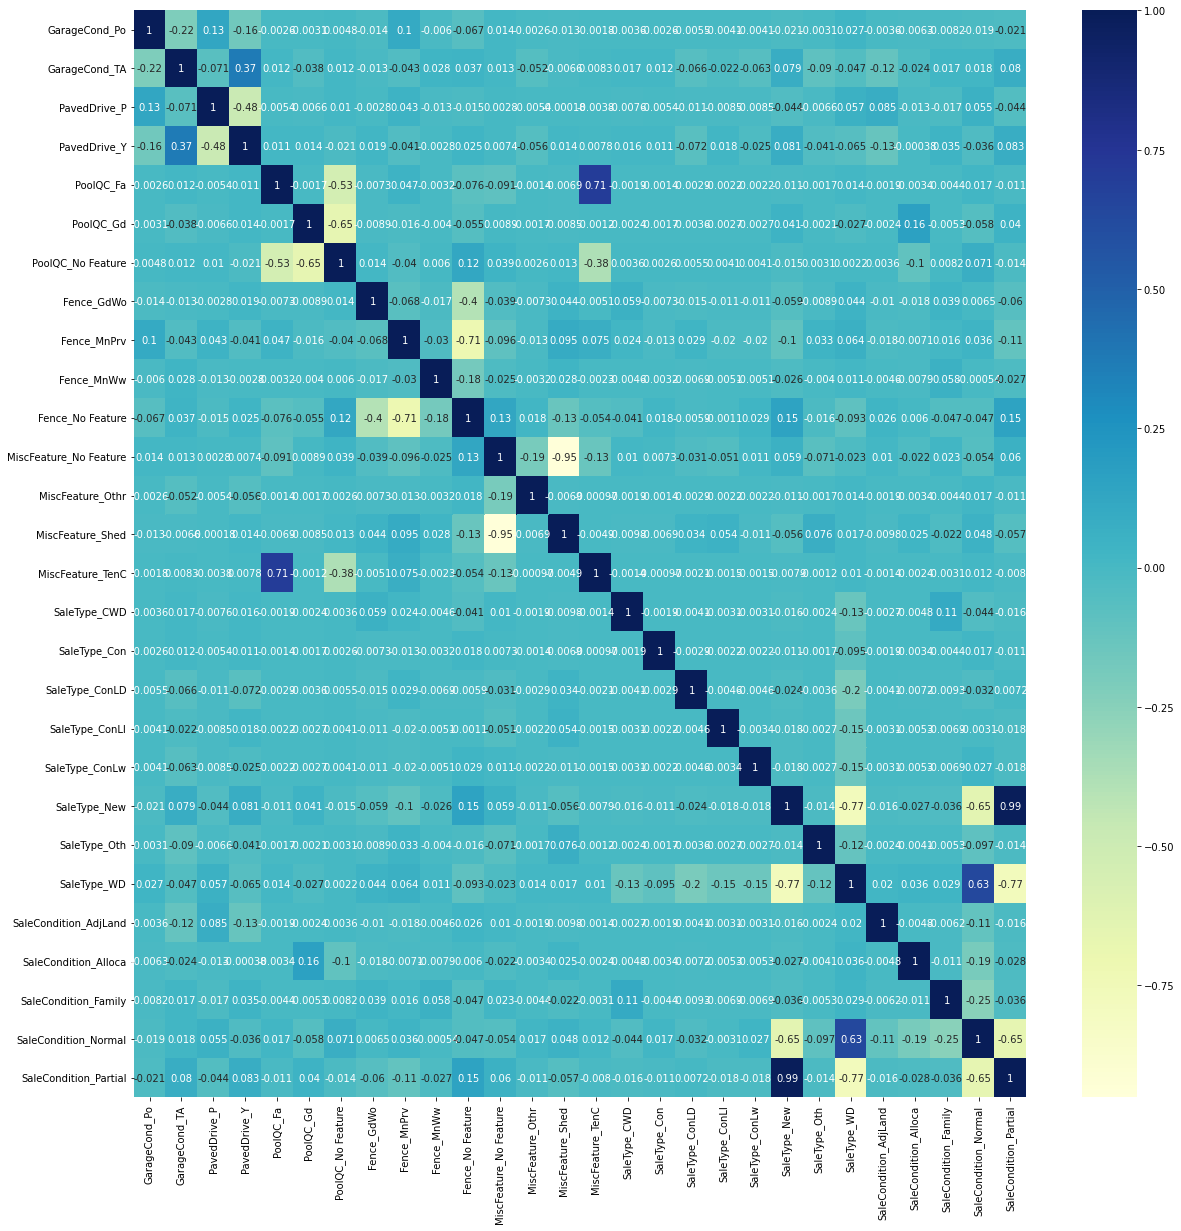

In [107]:
plt.figure(figsize=(20,20))
corr_matrix = house_price_final[batch_10].corr()

sb.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

**Columns**
- **SaleType_New and SaleCondition_partial has 99% of corelation**

In [108]:
house_price_final.drop(columns=["SaleType_New"],inplace=True)

##### Here after I'm not dropping the Dropping the variables, it is too much dificult  to viualize huge number of columns

**Decision:**
- I'm going to fit the linear model using statsmodel to handle multicollinearity mannually.

In [110]:
#Splitting dependent and independent variables
y=house_price_final["SalePrice"]
X=house_price_final.drop(columns="SalePrice")

In [111]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.131022,0.237179,-0.333130,0.652420,-0.563967,1.052885,0.878367,0.795371,0.614013,-0.958462,...,0,0,0,0,1,0,0,0,1,0
1,-0.935412,0.692573,-0.013184,-0.073043,2.030211,0.156125,-0.429430,-0.667124,1.241871,-0.648068,...,0,0,0,0,1,0,0,0,1,0
2,0.131022,0.328258,0.445869,0.652420,-0.563967,0.986459,0.829930,0.541673,0.106187,-0.300613,...,0,0,0,0,1,0,0,0,1,0
3,0.397630,0.085381,-0.027095,0.652420,-0.563967,-1.869888,-0.720051,-0.667124,-0.517053,-0.055078,...,0,0,0,0,1,0,0,0,0,0
4,0.131022,0.814011,1.283293,1.377883,-0.563967,0.953245,0.733056,1.944474,0.496290,-0.170896,...,0,0,0,0,1,0,0,0,1,0


In [112]:
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [115]:
print(X.shape)
print(y.shape)

(1460, 240)
(1460,)


#### Model Building
- In Here I'm gonna build the model Manually, because I want to Explore Multiple parameter which contribute our House price

- By Using the libraries like Sklearn and Stats-model

- In terms of linear modeling specifically, both libraries provide similar functionality for fitting linear regression models and making predictions. However, statsmodels provides more detailed output and diagnostic statistics, such as p-values, confidence intervals, and R-squared, which are often useful for hypothesis testing and model selection.In summary, if you are primarily interested in understanding the statistical relationships between variables, you might prefer to use statsmodels. If you are primarily interested in production-level machine learning and performance, you might prefer scikit-learn.

In [116]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.85, random_state=42)

In [117]:
print(X_train.shape)
print( X_test.shape)
print(y_train.shape)
print(y_test.shape)

(219, 240)
(1241, 240)
(219,)
(1241,)


In [118]:
#Importing necessary library
from sklearn import linear_model
#Creating Linear model object
linear_model = linear_model.LinearRegression()

#Fitting Model
linear_model.fit(X_train,y_train)


LinearRegression()

In [119]:

#Checking Intercept and Slopes of Line
#Slope
print(linear_model.coef_)

#Intercept
print(linear_model.intercept_)
#0.15401944764398745

[ 1.74269734e-01 -4.57605990e-03 -1.32130972e-02  5.71745298e-02
  4.00924012e-02  3.58442620e-02  5.16355850e-03  2.32943987e-02
  1.34918939e-01  7.49044197e-02  3.54106014e-02  1.42357124e-02
  1.27075337e-01 -2.05185638e-02 -6.19630793e-03  3.26824152e-02
 -2.10227561e-03  5.84128502e-02  1.47789720e-02  3.22353342e-02
  4.10189078e-03  2.81018445e-03  2.12654459e-02  1.22325967e-02
  2.33347081e-02  8.33178506e-03  1.14935822e-01  1.57538340e+11
 -1.16544184e-01  7.52748721e-03  5.85134733e-02  1.37116783e-01
  1.74026489e-02  8.94129276e-02 -2.30107307e-02  7.08527565e-02
 -6.13702719e+11  7.87582397e-02 -9.72414017e-02  2.94972275e+12
 -4.08878326e-02  9.40647721e-02  4.57060575e-01  2.03393208e+12
  1.89118385e-02 -3.47213745e-01 -2.28309631e-01 -1.02077484e-01
 -5.40561676e-02 -9.57414508e-02 -3.02238464e-02 -2.52521992e-01
 -4.26743507e-01  1.11255646e-02  4.55226898e-02 -1.83529222e+12
  3.20148468e-03 -4.33843136e-02 -1.94826126e-02  5.63011169e-02
 -5.79879284e-01 -8.98742

In [120]:
#Predict the target value
predicted_Value=linear_model.predict(X_train)

In [121]:
#Create Dataframe with actual and Predicted Values
Act_Pre_DataFrame=pd.DataFrame({"Actual":y_train,"Predicted":predicted_Value})
Act_Pre_DataFrame

,Actual,Predicted
1321,11.191342,11.191406
1171,12.001505,11.987305
146,11.561716,11.544189
402,11.589887,11.639404
954,11.755872,11.761108
...,...,...
1095,12.080691,12.008057
1130,11.813030,11.814209
1294,11.652687,11.630859
860,12.154516,12.153076


In [122]:

#Checking the 
from sklearn.metrics import r2_score
r2=r2_score(y_train, predicted_Value)
r2

0.992771119975136

In [123]:

#Compute the Predicted Values
y_test_pred=linear_model.predict(X_test)#Predicted Y values of training set

In [124]:

#Creating dataset for test dataset
#Create Dataframe with actual and Predicted Values
Act_Pre_DataFrame_test=pd.DataFrame({"Actual_Test":y_test,"Predicted_test":y_test_pred})
Act_Pre_DataFrame_test

,Actual_Test,Predicted_test
892,11.947949,1.190063e+01
1105,12.691580,1.275708e+01
413,11.652687,1.199780e+01
522,11.976659,1.227319e+01
1036,12.661914,1.253784e+01
...,...,...
1446,11.969717,1.243774e+01
1374,12.429216,1.273169e+01
550,11.849398,-1.835292e+12
928,12.373703,1.238501e+01


In [125]:
# check the test
r2=r2_score(y_test, y_test_pred)
r2

-8.69807895999011e+23

**Clearly our linear model over fit the data,it is not good,we should generalize the model**

#### Linear Regression Using StatsModel
- While Building model using Statsmodel, we can simply get to know what are the variables important for number of bicycle rent, at the same time we come to know how much the variables are important

- Using P-Values and VIF(Variance Inflation Factor), we get to know the important variables for Count

- With VIF, we able to see how well the specific variable can expalin by other variables in same dataset

**Our main objective of this problem is we should explain what are the factors affect the count of bicycle,that is the reason for using Statsmodel to build Model,Statsmodel can explain what the factors which affect the count of bicycle**

In [127]:

#Import the stats model apis
import statsmodels.api as sm

#Stats model for modelling the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
StatsModel_DataFrame=X_train.copy()

In [135]:
def p_value_VIF(dataset):
  #Adding Constant to the equations
  #By default the intercept didn't added to the model, so we need to add intercept by manual
  StatsModel_DataFrame=sm.add_constant(dataset)
  #Running the linear model
  linearModel=sm.OLS(y_train,dataset).fit()

  ## VIF
  # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
  vif = pd.DataFrame()
  vif['Features'] = StatsModel_DataFrame.columns
  vif['VIF'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  
  #Return the output variables
  return vif


In [138]:
vif_Values=p_value_VIF(StatsModel_DataFrame)
vif_Values

,Features,VIF
124,Exterior2nd_HdBoard,inf
116,Exterior1st_VinylSd,inf
138,ExterQual_Fa,inf
133,Exterior2nd_Wd Shng,inf
132,Exterior2nd_Wd Sdng,inf
...,...,...
229,SaleType_Con,NaN
230,SaleType_ConLD,NaN
231,SaleType_ConLI,NaN
232,SaleType_ConLw,NaN


In [146]:
first_Value=vif_Values
first_Value

,Features,VIF
124,Exterior2nd_HdBoard,inf
116,Exterior1st_VinylSd,inf
138,ExterQual_Fa,inf
133,Exterior2nd_Wd Shng,inf
132,Exterior2nd_Wd Sdng,inf
...,...,...
229,SaleType_Con,NaN
230,SaleType_ConLD,NaN
231,SaleType_ConLI,NaN
232,SaleType_ConLw,NaN
